<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [6]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 52.1 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 125.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 152.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 176.3 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=ee00625ec1f6524826b481ad67a47b760e4484b88e1dfdd446687f8f7f0e4266
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-linux_x86_64.whl size=303862 sha256=728b8bcf6546f46a446460bfcb5c22fc6ee286214afce23227ecc17f46348f3b
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d1/

In [7]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [8]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [9]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [10]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [11]:
import yfinance as yf
tesla = yf.Ticker("TSLA")
print(tesla.info["longName"])



Tesla, Inc.


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [12]:
# Extract Tesla stock historical data with maximum available period
tesla_data = tesla.history(period="max")

# Preview the first 5 rows
print(tesla_data.head())


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [13]:
# Q1: Import yfinance
import yfinance as yf

# Create ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Q2: Extract historical data (max period)
tesla_data = tesla.history(period="max")

# Q3: Reset the index
tesla_data.reset_index(inplace=True)

# Display first 5 rows
print(tesla_data.head())


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [14]:
# Import requests
import requests

# URL of the Tesla revenue webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Send GET request
response = requests.get(url)

# Save the HTML text into a variable
html_data = response.text

# Optional: Preview first 500 characters
print(html_data[:500])



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [15]:
from bs4 import BeautifulSoup

# Parse using html.parser
soup = BeautifulSoup(html_data, "html.parser")

# Optional: print a preview
print(soup.prettify()[:500])


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [16]:
from bs4 import BeautifulSoup
import pandas as pd

# Parse with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Find the Tesla Revenue table (last table on the page)
table = soup.find_all("table")[-1]

# Extract rows
rows = table.find_all("tr")

# Build DataFrame
data = []
for row in rows[1:]:  # skip header
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if len(cols) == 2:
        data.append(cols)

tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Clean Revenue column
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")

print(tesla_revenue.head())



                             Date Revenue
0  Tesla Revenue 2010-2022 | TSLA        
1                     Macrotrends        
2                          Source        


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [17]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

Execute the following lines to remove an null or empty strings in the Revenue column.


In [18]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [19]:
# Display last 5 rows of tesla_revenue
print(tesla_revenue.tail())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [20]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")

# Extract historical stock data for maximum available period
gme_data = gme.history(period="max")

# Display first 5 rows
print(gme_data.head())


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683251  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [21]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")

# Extract historical stock data for the maximum available period
gme_data = gme.history(period="max")

# Display first 5 rows
gme_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [22]:
# Import yfinance
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker("GME")

# Extract historical stock data for maximum period
gme_data = gme.history(period="max")

# Reset the index
gme_data.reset_index(inplace=True)

# Display first 5 rows
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [23]:
# Import requests
import requests

# URL of the GameStop revenue webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

# Send GET request
response = requests.get(url)

# Save the HTML content into a variable
html_data_2 = response.text

# Optional: preview first 500 characters
print(html_data_2[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [24]:
from bs4 import BeautifulSoup

# Parse the HTML
soup_2 = BeautifulSoup(html_data_2, "html.parser")

# Optional: preview first 500 characters
print(soup_2.prettify()[:500])


<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [25]:
from bs4 import BeautifulSoup
import pandas as pd

# Parse HTML
soup_2 = BeautifulSoup(html_data_2, "html.parser")

# Find the last table on the page (Tesla/GME revenue table is usually last)
table = soup_2.find_all("table")[-1]

# Extract rows
rows = table.find_all("tr")

# Build data list
data = []
for row in rows[1:]:  # skip header
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if len(cols) == 2:
        data.append(cols)

# Create DataFrame
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])

# Clean Revenue column
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(",", "").str.replace("$", "")

# Display first 5 rows
print(gme_revenue.head())


                               Date Revenue
0  GameStop Revenue 2006-2020 | GME        
1                       Macrotrends        
2                            Source        


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [26]:
# Display the last 5 rows of gme_revenue
print(gme_revenue.tail())


                               Date Revenue
0  GameStop Revenue 2006-2020 | GME        
1                       Macrotrends        
2                            Source        


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


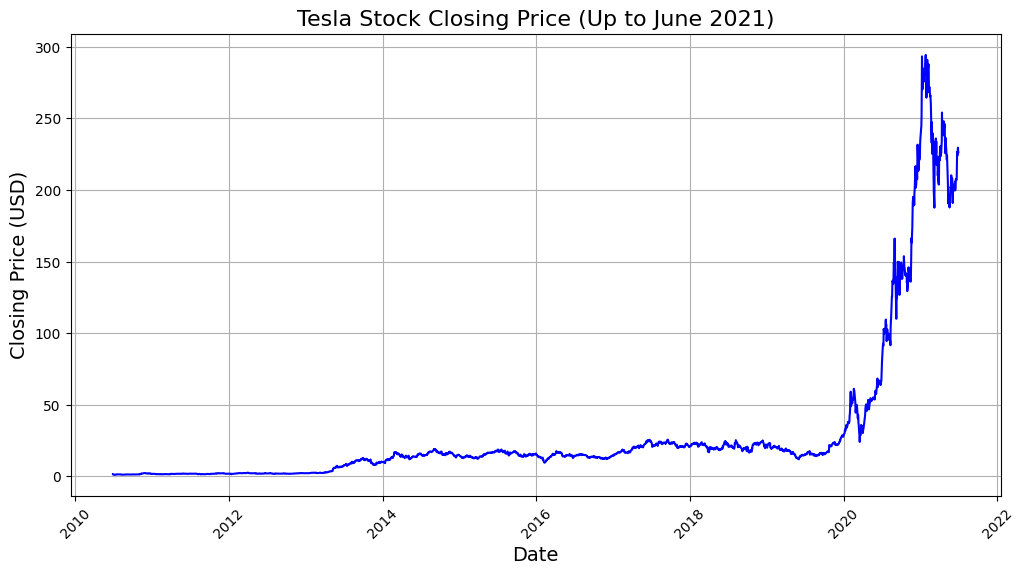

In [35]:
# Step 0: Install matplotlib if not already installed
!pip install matplotlib --quiet

# Step 1: Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()

# Step 3: Ensure 'Date' column is datetime
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

# Step 4: Filter data up to June 30, 2021
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Step 5: Plot Closing Price
plt.figure(figsize=(12,6))
plt.plot(tesla_data_filtered['Date'], tesla_data_filtered['Close'], color='blue')
plt.title("Tesla Stock Closing Price (Up to June 2021)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Closing Price (USD)", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


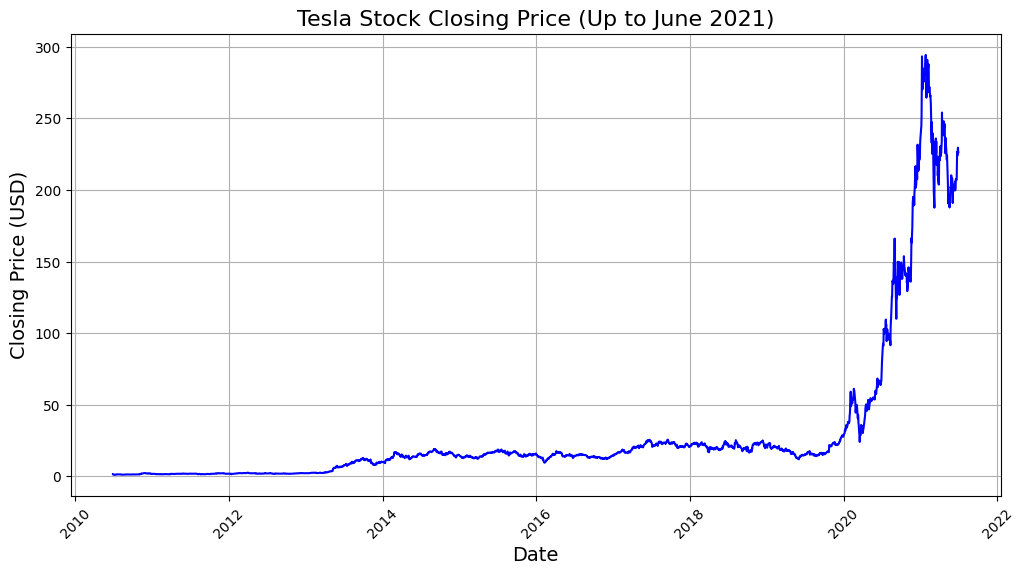

In [ ]:
# Step 0: Install required libraries (run once)
!pip install yfinance matplotlib pandas beautifulsoup4 html5lib --quiet

# Step 1: Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

# -----------------------------------
# TESLA STOCK DATA
# -----------------------------------
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max").reset_index()
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']

# Function to plot stock closing price
def plot_stock(df, title):
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], color='blue')
    plt.title(title, fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Closing Price (USD)", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plot Tesla Stock
plot_stock(tesla_data_filtered, "Tesla Stock Closing Price (Up to June 2021)")

# -----------------------------------
# GAMESTOP STOCK DATA
# -----------------------------------
gme = yf.Ticker("GME")
gme_data = gme.history(period="max").reset_index()
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']

# -----------------------------------
# GAMESTOP REVENUE DATA
# -----------------------------------
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data_2 = response.text

# Parse HTML and extract table
soup_2 = BeautifulSoup(html_data_2, "html.parser")
table = soup_2.find_all("table")[-1]  # Usually last table
rows = table.find_all("tr")
data = []
for row in rows[1:]:  # skip header
    cols = row.find_all("td")
    cols = [col.text.strip() for col in cols]
    if len(cols) == 2:
        data.append(cols)

gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
gme_revenue.dropna(inplace=True)
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(",", "").str.replace("$", "")
gme_revenue_filtered = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

# -----------------------------------
# Function to plot stock + revenue (dual axis)
# -----------------------------------
def make_graph(stock_df, revenue_df, company_name):
    fig, ax1 = plt.subplots(figsize=(12,6))
    
    # Plot stock closing price
    ax1.plot(stock_df['Date'], stock_df['Close'], color='blue', label='Closing Price')
    ax1.set_xlabel("Date", fontsize=14)
    ax1.set_ylabel("Stock Closing Price (USD)", color='blue', fontsize=14)
    ax1.tick_params(axis='y', labelcolor='blue')
    
    # Plot revenue on secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(revenue_df['Date'], revenue_df['Revenue'].astype(float), color='green', label='Revenue')
    ax2.set_ylabel("Revenue (USD millions)", color='green', fontsize=14)
    ax2.tick_params(axis='y', labelcolor='green')
    
    plt.title(f"{company_name} Stock Price and Revenue (Up to June 2021)", fontsize=16)
    fig.tight_layout()
    plt.show()

# Plot GameStop Stock + Revenue
make_graph(gme_data_filtered, gme_revenue_filtered, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
